데이터 전처리

# 결측치 처리

- 제거
- 채우기

##  

In [321]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np

In [322]:
d = {"score1": [100, 90, np.nan, 95],
    "score2": [30, np.nan, 45, 56],
    "score3": [52, 40, 80, 98],
    "score4": [np.nan, np.nan, np.nan, 65]}

In [323]:
df = pd.DataFrame(d)
df.head()

,score1,score2,score3,score4
0,100.0,30.0,52,NaN
1,90.0,NaN,40,NaN
2,NaN,45.0,80,NaN
3,95.0,56.0,98,65.0


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score1  3 non-null      float64
 1   score2  3 non-null      float64
 2   score3  4 non-null      int64  
 3   score4  1 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [325]:
df.isnull()  # null 값 있니 - True or False로 나타내줘

,score1,score2,score3,score4
0,False,False,False,True
1,False,True,False,True
2,True,False,False,True
3,False,False,False,False


In [326]:
df.isnull().sum()

score1    1
score2    1
score3    0
score4    3
dtype: int64

아하 score3을 제외한 모든 컬럼에 null값이 있구나

In [327]:
df[df.score1.isnull()]

,score1,score2,score3,score4
2,NaN,45.0,80,NaN


## 행을 기준으로 삭제

In [328]:
df.dropna() # 3행 빼고 null값 있는 행들 모두 삭제

,score1,score2,score3,score4
3,95.0,56.0,98,65.0


In [329]:
df.dropna(axis=0, how="any")  # 위에 있는 애랑 똑같다
                              # how = any <- 결측치가 있는 행 전부를 지우겠어

,score1,score2,score3,score4
3,95.0,56.0,98,65.0


## 열을 기준으로 삭제

In [330]:
df.dropna(axis=1) # 열 기준으로 null값 있는 열들 삭제

,score3
0,52
1,40
2,80
3,98


## 행의 전체값이 결측치인 행을 삭제

In [331]:
d2 = {"score1": [100, np.nan, np.nan, 95],
     "score2": [np.nan, np.nan, np.nan, np.nan],
     "score3": [52, np.nan, 80, 98], 
     "score4": [np.nan, np.nan, np.nan, 65]}

In [332]:
df2 = pd.DataFrame(d2)
df2

,score1,score2,score3,score4
0,100.0,NaN,52.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,80.0,NaN
3,95.0,NaN,98.0,65.0


In [333]:
df2.dropna(how="all")


,score1,score2,score3,score4
0,100.0,NaN,52.0,NaN
2,NaN,NaN,80.0,NaN
3,95.0,NaN,98.0,65.0


## 임계치 설정해서 제거

In [334]:
df2.dropna(thresh=2) #2개보다 null값이 많은 것만 지우기 

,score1,score2,score3,score4
0,100.0,NaN,52.0,NaN
3,95.0,NaN,98.0,65.0


적당한 임계치는 분석가가 판단해서 잘 설정해야 함

## 특정 열 안에서만 삭제

In [335]:
df.dropna(subset=["score2", "score4"])

,score1,score2,score3,score4
3,95.0,56.0,98,65.0


## 결측치 채우기

In [336]:
df.fillna(0) # 특정한 단일값으로 채우고 싶을 때

,score1,score2,score3,score4
0,100.0,30.0,52,0.0
1,90.0,0.0,40,0.0
2,0.0,45.0,80,0.0
3,95.0,56.0,98,65.0


## 결측치 바로 이전의 값으로 채우기

In [337]:
df.fillna(method="pad")

,score1,score2,score3,score4
0,100.0,30.0,52,NaN
1,90.0,30.0,40,NaN
2,90.0,45.0,80,NaN
3,95.0,56.0,98,65.0


각 nan값들이 이전의 값들로 채워짐  
앞의 행이 nan값이면 채워지지 않고 그대로 nan값을 가짐

## 결측치 바로 뒤의 값으로 채우기

In [338]:
df.fillna(method="bfill")

,score1,score2,score3,score4
0,100.0,30.0,52,65.0
1,90.0,45.0,40,65.0
2,95.0,45.0,80,65.0
3,95.0,56.0,98,65.0


## 결측치를 각 열의 평균값으로 채우기

In [339]:
df.fillna(df.mean())

,score1,score2,score3,score4
0,100.0,30.000000,52,65.0
1,90.0,43.666667,40,65.0
2,95.0,45.000000,80,65.0
3,95.0,56.000000,98,65.0


## 결측치를 각 열의 중간값, 최소값, 최대값 채우기

In [340]:
df.fillna(df.median())

,score1,score2,score3,score4
0,100.0,30.0,52,65.0
1,90.0,45.0,40,65.0
2,95.0,45.0,80,65.0
3,95.0,56.0,98,65.0


In [341]:
df.fillna(df.min())

,score1,score2,score3,score4
0,100.0,30.0,52,65.0
1,90.0,30.0,40,65.0
2,90.0,45.0,80,65.0
3,95.0,56.0,98,65.0


In [342]:
df.fillna(df.max())

,score1,score2,score3,score4
0,100.0,30.0,52,65.0
1,90.0,56.0,40,65.0
2,100.0,45.0,80,65.0
3,95.0,56.0,98,65.0


## replace() 함수로 결측치 채우기

In [343]:
df.replace(to_replace=np.nan, value=0)

,score1,score2,score3,score4
0,100.0,30.0,52,0.0
1,90.0,0.0,40,0.0
2,0.0,45.0,80,0.0
3,95.0,56.0,98,65.0


``replace``
- 지정한 값으로 결측치들이 모두 채워지게 됨 (이 부분은 fillna랑 같음)
- replace 함수는 nan값 대신에 특정한 문자를 다른 문자로 바꾸고 싶을 때 유용하게 사용됨


## interploate() 함수로 결측치 채우기

In [344]:
df.interpolate(method="linear", limit_direction="forward")

,score1,score2,score3,score4
0,100.0,30.0,52,NaN
1,90.0,37.5,40,NaN
2,92.5,45.0,80,NaN
3,95.0,56.0,98,65.0


In [345]:
df.interpolate(method="pad", limit=2)

,score1,score2,score3,score4
0,100.0,30.0,52,NaN
1,90.0,30.0,40,NaN
2,90.0,45.0,80,NaN
3,95.0,56.0,98,65.0


# 범주형 데이터를 원핫 인코딩으로 변경

``원핫인코딩``
- 모든 데이터를 **0과 1**로 변환
- 기계는 모든 데이터를 이진법으로 처리하기 때문에  
레이블 인코딩보다는 **원핫인코딩** 사용

In [346]:
df = pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [347]:
# 첫 번째 방법 - get_dummies()
one = pd.get_dummies(df)
one

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


``get_dummies()``의 문제??

train 데이터에만 있고 test 데이터에는 없는 카테고리를  
원핫인코딩된 컬럼으로 바꿔주지 못함

---
두 번째 방법 - **``sklearn OneHotEncoder``**사용


In [348]:
x = df.iloc[:,1:]
y = df['class']

In [349]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [350]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [351]:
from sklearn.preprocessing import OneHotEncoder  #원핫인코더 불러오기

one = OneHotEncoder(sparse=False)
one.fit(x[['cap-shape']])

OneHotEncoder(sparse=False)

In [352]:
train_cap = one.transform(x[['cap-shape']])
train_cap

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

엥 왜 컬럼이 6개로 바뀌었지? 카테고리를 확인해볼까?

In [353]:
one.categories_

[array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object)]

cap-shape에 있던 컬럼의 카테고리가 6개였기 때문이구나!

In [354]:
o = pd.DataFrame(train_cap, columns=["cap-shape_"+col for col in one.categories_[0]])

In [355]:
o

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0
8121,0.0,0.0,1.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0


---
이젠 숫자를 문자로 원래 데이터프레임으로 바꾸고 싶어 빼애애애애애애액!!!

In [356]:
one_x = pd.concat([x.drop(columns="cap-shape"), o], axis=1)
one_x

,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,ring-type,spore-print-color,population,habitat,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,s,n,t,p,f,c,n,k,e,e,...,p,k,s,u,0.0,0.0,0.0,0.0,0.0,1.0
1,s,y,t,a,f,c,b,k,e,c,...,p,n,n,g,0.0,0.0,0.0,0.0,0.0,1.0
2,s,w,t,l,f,c,b,n,e,c,...,p,n,n,m,1.0,0.0,0.0,0.0,0.0,0.0
3,y,w,t,p,f,c,n,n,e,e,...,p,k,s,u,0.0,0.0,0.0,0.0,0.0,1.0
4,s,g,f,n,f,w,b,k,t,e,...,e,n,a,g,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,s,n,f,n,a,c,b,y,e,?,...,p,b,c,l,0.0,0.0,0.0,1.0,0.0,0.0
8120,s,n,f,n,a,c,b,y,e,?,...,p,b,v,l,0.0,0.0,0.0,0.0,0.0,1.0
8121,s,n,f,n,a,c,b,n,e,?,...,p,b,c,l,0.0,0.0,1.0,0.0,0.0,0.0
8122,y,n,f,y,f,c,n,b,t,?,...,e,w,v,l,0.0,0.0,0.0,1.0,0.0,0.0


In [357]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(one_x, y,
                                                   random_state=0)

In [358]:
x_train

,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,ring-type,spore-print-color,population,habitat,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
5832,y,y,f,f,f,c,b,p,e,b,...,l,h,y,g,0.0,0.0,1.0,0.0,0.0,0.0
601,y,n,t,l,f,c,b,w,e,r,...,p,n,y,g,0.0,0.0,0.0,0.0,0.0,1.0
1601,s,g,f,n,f,w,b,k,t,e,...,e,k,a,g,0.0,0.0,1.0,0.0,0.0,0.0
4941,f,g,f,f,f,c,b,g,e,b,...,l,h,v,p,0.0,0.0,0.0,0.0,0.0,1.0
7492,y,n,f,f,f,c,n,b,t,?,...,e,w,v,d,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,y,e,t,n,f,c,b,e,e,?,...,e,w,c,w,0.0,0.0,0.0,0.0,0.0,1.0
3264,f,g,f,f,f,c,b,h,e,b,...,l,h,y,p,0.0,0.0,0.0,0.0,0.0,1.0
1653,s,g,f,n,f,w,b,h,t,e,...,e,n,s,g,0.0,0.0,0.0,0.0,0.0,1.0
2607,f,n,t,n,f,c,b,n,t,b,...,p,n,v,d,0.0,0.0,1.0,0.0,0.0,0.0


In [359]:
y_train

5832    p
601     e
1601    e
4941    p
7492    p
       ..
4931    e
3264    p
1653    e
2607    e
2732    e
Name: class, Length: 6093, dtype: object

In [360]:
x_test

,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,ring-type,spore-print-color,population,habitat,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
380,y,n,t,p,f,c,n,p,e,e,...,p,k,s,u,0.0,0.0,0.0,0.0,0.0,1.0
3641,y,g,t,n,f,c,b,p,t,b,...,p,k,y,d,0.0,0.0,1.0,0.0,0.0,0.0
273,y,y,t,a,f,c,b,k,e,c,...,p,n,n,m,0.0,0.0,0.0,0.0,0.0,1.0
1029,s,w,f,n,f,w,b,k,t,e,...,e,k,a,g,0.0,0.0,0.0,0.0,0.0,1.0
684,f,n,t,n,f,c,b,p,t,b,...,p,n,v,d,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,s,w,f,n,f,w,b,h,t,e,...,e,k,s,g,0.0,0.0,0.0,0.0,0.0,1.0
6181,s,n,f,s,f,c,n,b,t,?,...,e,w,v,d,0.0,0.0,1.0,0.0,0.0,0.0
6228,y,e,f,s,f,c,n,b,t,?,...,e,w,v,d,0.0,0.0,0.0,0.0,0.0,1.0
554,s,y,t,l,f,c,b,k,e,c,...,p,k,s,g,0.0,0.0,0.0,0.0,0.0,1.0


In [361]:
y_test

380     p
3641    e
273     e
1029    e
684     e
       ..
1859    e
6181    p
6228    p
554     e
7025    e
Name: class, Length: 2031, dtype: object

# 범주특성을 레이블 인코딩으로 변환

- 숫자의 크고 작음에 대한 특성이 작용함
- **회귀**와 같이 연속된 실수를 다루는 알고리즘에서  
레이블 인코딩을 사용하면 잘못된 결과값이 나올 수도 있음

In [362]:
one_x["cap-surface"].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

In [363]:
# cap-surface의 유니크한 카데고리 데이터 개수 확인
one_x["cap-surface"].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

In [364]:
# 인코딩전
one_x["cap-surface"]

0       s
1       s
2       s
3       y
4       s
       ..
8119    s
8120    s
8121    s
8122    y
8123    s
Name: cap-surface, Length: 8124, dtype: object

In [365]:
# 인코딩 후 - map 사용
one_x["cap-surface"] = one_x["cap-surface"].map({"y":0, "s":1, "f":2, "g":3})
one_x["cap-surface"]

0       1
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: cap-surface, Length: 8124, dtype: int64

In [366]:
one_x["cap-surface"].value_counts()

0    3244
1    2556
2    2320
3       4
Name: cap-surface, dtype: int64

In [367]:
from sklearn.preprocessing import LabelEncoder

In [368]:
encoder = LabelEncoder()
encoder.fit(one_x["cap-color"]) # 학습

LabelEncoder()

In [369]:
one_x['cap-color'] = encoder.transform(one_x["cap-color"])

In [370]:
one_x

,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,...,ring-type,spore-print-color,population,habitat,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,1,4,t,p,f,c,n,k,e,e,...,p,k,s,u,0.0,0.0,0.0,0.0,0.0,1.0
1,1,9,t,a,f,c,b,k,e,c,...,p,n,n,g,0.0,0.0,0.0,0.0,0.0,1.0
2,1,8,t,l,f,c,b,n,e,c,...,p,n,n,m,1.0,0.0,0.0,0.0,0.0,0.0
3,0,8,t,p,f,c,n,n,e,e,...,p,k,s,u,0.0,0.0,0.0,0.0,0.0,1.0
4,1,3,f,n,f,w,b,k,t,e,...,e,n,a,g,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,f,n,a,c,b,y,e,?,...,p,b,c,l,0.0,0.0,0.0,1.0,0.0,0.0
8120,1,4,f,n,a,c,b,y,e,?,...,p,b,v,l,0.0,0.0,0.0,0.0,0.0,1.0
8121,1,4,f,n,a,c,b,n,e,?,...,p,b,c,l,0.0,0.0,1.0,0.0,0.0,0.0
8122,0,4,f,y,f,c,n,b,t,?,...,e,w,v,l,0.0,0.0,0.0,1.0,0.0,0.0


In [371]:
one_x["cap-color"].value_counts()

4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: cap-color, dtype: int64

# 

## 

In [372]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np

In [373]:
ul = pd.read_csv("use_log.csv")
cust_m = pd.read_csv("customer_master.csv")
class_m = pd.read_csv("class_master.csv")
camp_m = pd.read_csv("campaign_master.csv")

- ``use_log``: **이용 이력** 데이터
- ``cust_m``: **회원 정보** 데이터 - 탈퇴한 회원을 포함한  
모든 회원에 대한 정보 / end date가 비어져 있으면 탈퇴하지 않은 회원
- ``class_m``: **회원구분** 데이터 (종일 / 주간 / 야간)
- ``camp_m``: **프로모션 구분**데이터 (무료 / 반액할인 / 일반권)

In [374]:
display(ul.head(), cust_m.head(), class_m.head(), camp_m.head())

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


---
고객현황 데이터인 ``cust_m``에 ``class_m`` 데이터를 결합하여  
새로운 데이터프레임을 생성하겠다

In [375]:
cust_join = pd.merge(cust_m, class_m, on="class", how="left")

In [376]:
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000


In [377]:
cust_join = pd.merge(cust_join, camp_m, on="campaign_id", how="left")
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [378]:
# 공통컬럼 기준으로 잘 합쳐졌는지 확인
print(len(cust_m))
print(len(cust_join))

4192
4192


In [379]:
cust_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   int64 
 8   class_name     4192 non-null   object
 9   price          4192 non-null   int64 
 10  campaign_name  4192 non-null   object
dtypes: int64(2), object(9)
memory usage: 393.0+ KB


In [380]:
cust_join.isna().sum()  # null값 합쳐서 몇 개야??

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

원본인 ``cust_m``과 결합된 새로운 데이터프레임인  
``cust_join``의 **행** 개수가 똑같으므로  
열 기준으로 결합이 잘된다~~

- **결측치**를 확인하는 이유는?
    - 결합할 때 키가 없거나 결합이 잘못되면  
    자동으로 결측치가 들어가기 때문  
    → 그러므로 결합 후에는 결측치를 확인해주는게 좋음
    
- 원래 결측치가 있던 ``end_data``에만 결측치가 있으므로  데이터가 잘 들어가져 있다~~ 라고 확인됨

---

In [381]:
cust_join.isna().sum()

# 진짜로 얘가 customer id가 다 달라서 그런건지??

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [382]:
cust_join["customer_id"].nunique()

4192

아하 우리 고객의 수가 4192명이 맞구나~~

## cust_join 데이터프레임 분석

내가 이 데이터프레임을 보았을 때  
어떤 궁금한 점을 뽑아낼 수 있을까???????????

예시:  
어떤 종류의 회원이 있고 어떤 캠페인으로 많이 가입했는지?  
언제 가입/탈퇴한 회원이 많은지?  
남녀 비율은 어떻게 될까?  
탈퇴한 회원들은 얼만큼의 기간동안 스포츠 센터를 다녔는지?

In [383]:
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [384]:
cust_join.class_name.value_counts()

0_종일    2045
2_야간    1128
1_주간    1019
Name: class_name, dtype: int64

In [385]:
cust_join.groupby("class_name")["customer_id"].count() 
# class_name 기준으로 customer_id개수 세줘?

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [386]:
# 회원권 종류별로 비율 확인
round((cust_join.groupby("class_name")["customer_id"].count() / cust_join.shape[0])*100, 1)

class_name
0_종일    48.8
1_주간    24.3
2_야간    26.9
Name: customer_id, dtype: float64

In [387]:
# 프로모션 현황 비율 확인
round((cust_join.groupby("campaign_name")["customer_id"].count() / cust_join.shape[0])*100, 1)

campaign_name
0_입회비반액할인    15.5
1_입회비무료      11.7
2_일반         72.8
Name: customer_id, dtype: float64

In [388]:
# 성별 현황
print(round((cust_join.groupby("gender")["customer_id"].count())))

# 성별 현황 비율
print(round((cust_join.groupby("gender")["customer_id"].count() / cust_join.shape[0])*100, 1))

gender
F    1983
M    2209
Name: customer_id, dtype: int64
gender
F    47.3
M    52.7
Name: customer_id, dtype: float64


In [389]:
# 탈퇴자 현황
print(round((cust_join.groupby("end_date")["customer_id"].count())))

# 탈퇴자 현황 비율
print(round((cust_join.groupby("end_date")["customer_id"].count() / cust_join.shape[0])*100, 1))


end_date
2018-04-30 00:00:00    121
2018-05-31 00:00:00    125
2018-06-30 00:00:00    106
2018-07-31 00:00:00    102
2018-08-31 00:00:00    113
2018-09-30 00:00:00    104
2018-10-31 00:00:00     90
2018-11-30 00:00:00     89
2018-12-31 00:00:00    111
2019-01-31 00:00:00    129
2019-02-28 00:00:00    149
2019-03-31 00:00:00    111
Name: customer_id, dtype: int64
end_date
2018-04-30 00:00:00    2.9
2018-05-31 00:00:00    3.0
2018-06-30 00:00:00    2.5
2018-07-31 00:00:00    2.4
2018-08-31 00:00:00    2.7
2018-09-30 00:00:00    2.5
2018-10-31 00:00:00    2.1
2018-11-30 00:00:00    2.1
2018-12-31 00:00:00    2.6
2019-01-31 00:00:00    3.1
2019-02-28 00:00:00    3.6
2019-03-31 00:00:00    2.6
Name: customer_id, dtype: float64


데이터를 분석하면서 항상 궁금한 점을 생각해보기
- 남자가 더 많이 가입한 이유가 있을까?
- 탈퇴한 사람들은 왜 탈퇴했을까? (얘네들은 프로모션만 이용하나?)

In [390]:
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [391]:
cust_join.shape

(4192, 11)

## 데이터 조건별로 뽑아보기

최신데이터를 뽑아보기 
- 2019년 3월 이용자 뽑기 -> end date가 2019.3.31 이후거나 탈퇴한 적이 없어야 함

In [392]:
cust_join["end_date"] = pd.to_datetime(cust_join["end_date"])
cust_new = cust_join[(cust_join["end_date"]>=pd.to_datetime("20190331")) | (cust_join["end_date"].isnull())]
cust_new

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반


In [393]:
cust_new["end_date"].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [394]:
# 어떤 회원권을 많이 사용하고 있는지 확인

cust_new.groupby("class_name")["customer_id"].count()

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [395]:

print(round((cust_new.groupby("class_name")["customer_id"].count() / cust_join.shape[0])*100, 1))

class_name
0_종일    34.4
1_주간    16.6
2_야간    19.4
Name: customer_id, dtype: float64


In [396]:
# 프로모션 비율 확인
print(round((cust_new.groupby("campaign_name")["customer_id"].count() / cust_join.shape[0])*100, 1))

campaign_name
0_입회비반액할인     7.4
1_입회비무료       5.8
2_일반         57.3
Name: customer_id, dtype: float64


In [397]:
# 성별 비율 확인
print(round((cust_new.groupby("gender")["customer_id"].count() / cust_join.shape[0])*100, 1))

gender
F    33.4
M    37.0
Name: customer_id, dtype: float64


<데이터 분석 해석>
- 회원권과 성별 변수에 대해서는 전체 데이터에 대해 뽑았던 것과 비율이 크게 다르지 않음
    - 특정 회원권이나 성별이 탈퇴한 것은 아님
- 전체 데이터에서 프로모션 비율 중 일반가입이 70% 정도였는데, 최신 사용자 데이터에서는 일반 80% (10% 차이)
    - 프로모션으로 가입한 사람은 일반 가입한 사람보다 계속 이용할 가능성이 낮을 수 있지 않을까?

## 이용이력 데이터 분석

In [398]:
ul.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


회원이 스포츠센터를 이용할 때 시간이 찍히기 때문에 시간적 요소를 분석해볼 수 있겠다

<예시>
- 한 달 이용 횟수의 변화
- 회원이 스포츠센터를 정기적으로 이용하는지
- 회원들이 월 별로 스포츠센터를 이용하는 평균 수치, 중앙값, 최대, 최소값

In [399]:
ul["usedate"] = pd.to_datetime(ul["usedate"]) # 데이터를 날짜형 데이터로 변환

In [400]:
ul["년월"] = ul["usedate"].dt.strftime("%Y%m")

In [401]:
ul.head()

,log_id,customer_id,usedate,년월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [402]:
# 월별, 고객 id별 이용횟수 카운트
ul_month = ul.groupby(["년월", "customer_id"], as_index=False).count()

## 월별 고객의 스포츠센터 사용횟수 데이터

In [403]:
# 컬럼 이름 변경
ul_month.rename(columns={"log_id":"cnt"}, inplace=True)

# usedate 열 삭제
ul_month.drop("usedate", axis=1, inplace=True)
ul_month.head()


,년월,customer_id,cnt
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [404]:
# 고객별 월평균 사용횟수
ul_cust = ul_month.groupby("customer_id")["cnt"].agg([np.mean, np.median, np.min, np.max])
ul_cust
ul_cust = ul_cust.reset_index(drop=False)
ul_cust.head()

,customer_id,mean,median,amin,amax
0,AS002855,4.500000,5.0,2,7
1,AS008805,4.000000,4.0,1,8
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,3,7
4,AS015233,7.545455,7.0,4,11


## 정기적으로 스포츠센터를 사용하는 고객인지 확인

- 매주 같은 요일에 스포츠센터에 왔는지 아닌지로 판단해보기
- 월/요일별로 방문한 횟수의 최대값이 4이상인 요일에 하나라도 있으면 이 회원은 정기 사용자로 판단


In [405]:
# 요일 뽑기
# weekday: 월요일 -0, 일요일 -6
ul["weekday"] = ul["usedate"].dt.weekday
ul.head()

,log_id,customer_id,usedate,년월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


In [406]:
ul_week = ul.groupby(["customer_id", "년월", "weekday"], as_index=False).count()

In [407]:
ul_week.rename(columns={"log_id":"cnt"}, inplace=True)

In [408]:
ul_week

,customer_id,년월,weekday,cnt,usedate
0,AS002855,201804,5,4,4
1,AS002855,201805,2,1,1
2,AS002855,201805,5,4,4
3,AS002855,201806,5,5,5
4,AS002855,201807,1,1,1
...,...,...,...,...,...
93328,TS999855,201901,1,1,1
93329,TS999855,201901,5,4,4
93330,TS999855,201901,6,1,1
93331,TS999855,201902,5,4,4


In [409]:
del ul_week["usedate"]
ul_week.head()

,customer_id,년월,weekday,cnt
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


-> 토요일마다 정기적으로 방문하는 사람인가???

``ul_week`` 데이터프레임을 가지고  
cnt 4이상이면 1, 아니면 0인 컬럼 만들기

정기적인지 아닌지를 이렇게 만들어보자~~


In [410]:
# 방법1: apply lambda
ul_week = ul_week.groupby("customer_id", as_index=False)[["cnt"]].max()
ul_week["flag1"] = ul_week["cnt"].apply(lambda x: 1 if x>=4 else 0)

In [411]:
ul_week

,customer_id,cnt,flag1
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


In [412]:
# 방법2: boolean indexing
ul_week["flag2"] = 0
is_over4 = (ul_week["cnt"]>=4)
ul_week.loc[(is_over4), "flag2"] = 1
ul_week

,customer_id,cnt,flag1,flag2
0,AS002855,5,1,1
1,AS008805,4,1,1
2,AS009013,2,0,0
3,AS009373,5,1,1
4,AS015233,5,1,1
...,...,...,...,...
4187,TS995853,5,1,1
4188,TS998593,5,1,1
4189,TS999079,5,1,1
4190,TS999231,5,1,1


In [413]:
# 방법3: where문 사용
ul_week["flag3"] = 0

# 조건이 참이면 0이고 거짓이면 1을 넣습니다
ul_week["flag3"] = ul_week["flag3"].where(ul_week["cnt"]<4, 1)

In [414]:
ul_week

,customer_id,cnt,flag1,flag2,flag3
0,AS002855,5,1,1,1
1,AS008805,4,1,1,1
2,AS009013,2,0,0,0
3,AS009373,5,1,1,1
4,AS015233,5,1,1,1
...,...,...,...,...,...
4187,TS995853,5,1,1,1
4188,TS998593,5,1,1,1
4189,TS999079,5,1,1,1
4190,TS999231,5,1,1,1


## 고객 데이터와 이용이력 데이터 조인

In [415]:
display(cust_join.head(), ul_cust.head(), ul_week.head())

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반


,customer_id,mean,median,amin,amax
0,AS002855,4.500000,5.0,2,7
1,AS008805,4.000000,4.0,1,8
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,3,7
4,AS015233,7.545455,7.0,4,11


,customer_id,cnt,flag1,flag2,flag3
0,AS002855,5,1,1,1
1,AS008805,4,1,1,1
2,AS009013,2,0,0,0
3,AS009373,5,1,1,1
4,AS015233,5,1,1,1


3개 데이터프레임의 공통 컬럼은 ``customer_id``

``customer_id``를 기준으로 데이터를 합친다

In [416]:
cust_join = pd.merge(cust_join, ul_cust, on="customer_id", how="left")
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amin,amax
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,2,8
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,3,7
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,3,6
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,2,7
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,1,6


In [417]:
cust_join = pd.merge(cust_join, ul_week[["customer_id", "flag1"]], on="customer_id", how="left")
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amin,amax,flag1
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,2,8,1
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,3,7,1
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,3,6,1
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,2,7,1
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,1,6,1


In [418]:
# 길이 확인
print(len(cust_join))

4192


In [419]:
cust_join.isna().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
amin                0
amax                0
flag1               0
dtype: int64

## 회원기간 계산

In [420]:
cust_join["cal_date"] = cust_join["end_date"]
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amin,amax,flag1,cal_date
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,2,8,1,NaT
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,3,7,1,NaT
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,3,6,1,NaT
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,2,7,1,NaT
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,1,6,1,NaT


In [421]:
# end_date가 비워진 경우에는 cal_date에 2019-04-30일까지 임의로 채워주기

cust_join["cal_date"].fillna(pd.to_datetime("20190430"), inplace=True)

In [422]:
cust_join["start_date"] = pd.to_datetime(cust_join["start_date"])
cust_join["end_date"] = pd.to_datetime(cust_join["end_date"])
cust_join["cal_date"] = pd.to_datetime(cust_join["cal_date"])

In [423]:
# 회원 기간을 계산한 mem_perid 컬럼 추가
cust_join["mem_period"] = (cust_join["cal_date"] - cust_join["start_date"]) / np.timedelta64(1, "M")

In [424]:
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amin,amax,flag1,cal_date,mem_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,2,8,1,2019-04-30,47.968131
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,3,7,1,2019-04-30,47.968131
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,3,6,1,2019-04-30,47.968131
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,2,7,1,2019-04-30,47.968131
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,1,6,1,2019-04-30,47.968131


## 고객 행동 통계량 파악

In [425]:
#cust_join[["mean", "median", "amax", "amin"]].describe()
cust_join[['mean','median','amax','amin']].describe()

,mean,median,amax,amin
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


1인당 월 평균 5.3회, 1인당 중간값 5.2,  
1인당 최대 이용횟수 7.8회, 1인당 최소 이용횟수 3회

In [428]:
# 전체 고객 중 정기적으로 스포츠센터를 사용하는 비율
round(cust_join.groupby("flag1").count()["customer_id"] / cust_join.shape[0] * 100, 1)

flag1
0    18.6
1    81.4
Name: customer_id, dtype: float64

flag가 1이면  
한 달 동안 특정 요일에 4번 이상 스포츠센터를 방문함  
-> 정기적으로 이용하는 사람이다 (가정)  

정기적으로 스포츠센터를 이용하는 사람은 81%

In [427]:
cust_join.shape

(4192, 18)

In [429]:
# 전체 회원들 중에서 얼만큼 스포츠 센터를 다녔는지 기간을 뽑아보겠다
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

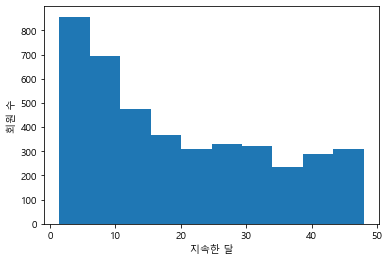

In [430]:
# 히스토그램도 그릴 거야
plt.hist(cust_join["mem_period"])
plt.xlabel("지속한 달")
plt.ylabel("회원 수")
plt.show()

회원 수가 유지되는 개월 수가 가장 많은 기간은  
0~10개월 사이이고,  
10개월 이상 다니고 있는 회원 수의 분포는 비슷비슷하네?

그럼 10개월까지가 회원을 지속하는 고비일 수도 있겠네?  
그럼 10개월 넘게 다니도록 하려면 어떻게 해야할까?


## 탈퇴회원과 지속하는 회원과의 차이를 파악

In [432]:
# 탈퇴회원 통계량
cust_join[cust_join["is_deleted"]==1].describe()

,is_deleted,price,mean,median,amin,amax,flag1,mem_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,1.821481,6.461481,0.456296,8.878534
std,0.0,1949.163652,1.246385,1.270847,0.976361,2.584021,0.498271,5.095672
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.445615
25%,1.0,6000.000000,3.000000,3.000000,1.000000,4.000000,0.000000,4.928233
50%,1.0,7500.000000,4.000000,4.000000,2.000000,7.000000,0.000000,7.950882
75%,1.0,10500.000000,4.666667,4.500000,2.000000,8.000000,1.000000,11.959178
max,1.0,10500.000000,9.000000,9.000000,8.000000,13.000000,1.000000,23.951210


In [433]:
# 다니고 있는 회원의 통계량
cust_join[cust_join["is_deleted"]==0].describe()

,is_deleted,price,mean,median,amin,amax,flag1,mem_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,3.620690,8.471147,0.984166,24.840061
std,0.0,1977.189779,1.553587,1.599765,2.030488,1.571048,0.124855,13.827461
min,0.0,6000.000000,3.166667,3.000000,1.000000,5.000000,0.000000,1.511325
25%,0.0,6000.000000,4.833333,5.000000,2.000000,7.000000,1.000000,12.813405
50%,0.0,7500.000000,5.583333,5.500000,3.000000,8.000000,1.000000,24.936857
75%,0.0,10500.000000,7.178030,7.000000,5.000000,10.000000,1.000000,35.943243
max,0.0,10500.000000,12.000000,12.000000,12.000000,14.000000,1.000000,47.968131


탈퇴회원은 지속회원보다 매월 이용횟수가 평균, 중간값, 최대, 최소 모두 작음  
flag를 보면 탈퇴회원은 0.45, 지속회원은 0.98로 거의 1  
지속회원은 한 달동안 특정 요일에 매주 방문하는 비율이 거의 전체  
탈퇴회원은 회원유지기간이 평균 8주, 지속회원은 평균 24주

In [434]:
cust_join.to_csv("customer_join.csv", index=False)

# 

In [436]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [438]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [439]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

## 1. StandardScaler

- 각 데이터의 feature들의 평균을 0, 분산을 1로 변경
- 모든 feature들이 같은 스케일을 갖게 됨

In [443]:
# 라이브러리 불러오기

from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(x_train)
x_scaled1 = scaler1.transform(x_train)


In [444]:
x_scaled1

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [445]:
print("스케일 조정 전 min value: ", x_train.min(axis=0))
print("스케일 조정 전 max value: ", x_train.max(axis=0))
print("스케일 조정 후 min value: ", x_scaled1.min(axis=0))
print("스케일 조정 후 max value: ", x_scaled1.max(axis=0))

스케일 조정 전 min value:  [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정 전 max value:  [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
스케일 조정 후 min value:  [-2.02304051 -2.31265646 -1.98102078 -1.43031247 -3.16043159 -1.66502629
 -1.13037758 -1.26748337 -2.69245547 -1.84928844 -1.02253911 -1.55688818
 -1.01199829 -0.69064562 -1.86789242 -1.34651102 -1.00915683 -1.98136529
 -1.53238992 -1.07259928 -1.71542529 -2.2481009  -1.68161632 -1.19940347
 -2.67791268 -1.48658803 -1.36015

## RobustScaler

모든 feature가 같은 크기를 갖는다는 점에서 StandardScaler와 비슷하지만,  
**평균**이기 때문에 분산 대신에 ``median``과 ``quartile``을 사용한다

**이상치**에 영향을 받지 않는다가 장점


In [446]:
# 라이브러리 불러오기
from sklearn.preprocessing import RobustScaler

scaler2 = RobustScaler()
x_scaled2 = scaler2.fit_transform(x_train)

In [447]:
print("스케일 조정 전 min value: ", x_train.min(axis=0))
print("스케일 조정 전 max value: ", x_train.max(axis=0))
print("스케일 조정 후 min value: ", x_scaled2.min(axis=0))
print("스케일 조정 후 max value: ", x_scaled2.max(axis=0))

스케일 조정 전 min value:  [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정 전 max value:  [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
스케일 조정 후 min value:  [-1.58561686 -1.67896679 -1.5013689  -1.16660726 -2.30881961 -1.19057491
 -0.63597464 -0.62177215 -2.15384615 -1.44313968 -0.8600647  -1.18226678
 -0.87312212 -0.61824912 -1.55668617 -0.97626846 -1.05423348 -1.56999564
 -1.36098175 -0.97051424 -1.18334735 -1.63681438 -1.13928636 -0.87578375
 -2.036      -0.98594566 -0.87838

## MinMaxScaler

모든 feature가 0과 1 사이에 위치하게 만든다  
데이터가 2차원 셋일 경우, 모든 데이터는 x축의 0과 1사이에  
y축의 0과 1사이에 위치하게 된다

In [448]:
# 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler


In [449]:
scaler3 = MinMaxScaler()
x_scaled3 = scaler3.fit_transform(x_train)

In [450]:
print("스케일 조정 전 min value: ", x_train.min(axis=0))
print("스케일 조정 전 max value: ", x_train.max(axis=0))
print("스케일 조정 후 min value: ", x_scaled3.min(axis=0))
print("스케일 조정 후 max value: ", x_scaled3.max(axis=0))

스케일 조정 전 min value:  [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정 전 max value:  [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
스케일 조정 후 min value:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 max value:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## Normalizer

StandardScaler, RobustScaler, MinMaxScaler 각 **컬럼**별로 스케일을 조절하는 게 아니라  
**행(row)** 별로 정규화 하더라~~~  

빠르게 학습할 수 있고, 과대적합될 확률을 낮출 수 있다

In [451]:
# 라이브러리 불러오기
from sklearn.preprocessing import Normalizer

scaler4 = Normalizer()
x_scaled4 = scaler4.fit_transform(x_train)

In [452]:
print("스케일 조정 전 min value: ", x_train.min(axis=0))
print("스케일 조정 전 max value: ", x_train.max(axis=0))
print("스케일 조정 후 min value: ", x_scaled4.min(axis=0))
print("스케일 조정 후 max value: ", x_scaled4.max(axis=0))

스케일 조정 전 min value:  [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
스케일 조정 전 max value:  [2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
스케일 조정 후 min value:  [5.51189319e-03 4.56825580e-03 3.63962422e-02 3.76233264e-01
 2.17902707e-05 2.37805701e-05 0.00000000e+00 0.00000000e+00
 4.14296567e-05 1.13032004e-05 1.38230416e-04 2.22630519e-04
 8.95949678e-04 1.14342671e-02 1.17600717e-06 2.76335624e-06
 0.00000000e+00 0.00000000e+00 3.33747542e-06 5.12412074e-07
 7.24466195e-03 5.15

## 모델에 스케일링된 데이터 적용

In [453]:
# 라이브러리 불러오기
from sklearn.svm import SVC

In [454]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [456]:
print(" 학습 데이터 정확도:", svc.score(x_train, y_train))
print(" 테스트 데이터 정확도:", svc.score(x_test, y_test))

 학습 데이터 정확도: 0.903755868544601
 테스트 데이터 정확도: 0.9370629370629371


In [457]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [458]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [460]:
svc1 = SVC()
svc1.fit(x_train_scaled, y_train)

SVC()

In [470]:
print(" 학습 데이터 정확도:", svc.score(x_train_scaled, y_train))
print(" 테스트 데이터 정확도:", svc.score(x_test_scaled, y_test))

 학습 데이터 정확도: 0.6267605633802817
 테스트 데이터 정확도: 0.6293706293706294


In [471]:
scaler = RobustScaler()
scaler.fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

In [472]:
svc2 = SVC()
svc2.fit(x_train_scaled, y_train)

SVC()

In [474]:
print(" 학습 데이터 정확도:", svc2.score(x_train_scale, y_train))
print(" 테스트 데이터 정확도:", svc2.score(x_test_scale, y_test))

 학습 데이터 정확도: 0.9859154929577465
 테스트 데이터 정확도: 0.972027972027972


In [475]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [476]:
svc3 = SVC()
svc3.fit(x_train_scaled, y_train)

SVC()

In [478]:
print(" 학습 데이터 정확도:", svc3.score(x_train_scaled, y_train))
print(" 테스트 데이터 정확도:", svc3.score(x_test_scaled, y_test))

 학습 데이터 정확도: 0.9835680751173709
 테스트 데이터 정확도: 0.972027972027972


In [479]:
scaler = Normalizer()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [480]:
svc4 = SVC()
svc4.fit(x_train_scaled, y_train)

SVC()

In [481]:
print(" 학습 데이터 정확도:", svc4.score(x_train_scaled, y_train))
print(" 테스트 데이터 정확도:", svc4.score(x_test_scaled, y_test))

 학습 데이터 정확도: 0.8943661971830986
 테스트 데이터 정확도: 0.8811188811188811
